In [75]:
# Load necessary Libraries 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [76]:
# read Dataset [ STEP 1: Collect the data ]
data = pd.read_csv("Dataset/CarPrice.csv")
#data.info()
#data = data.drop('CarName',axis=1, inplace=True)
# # divide dataset into dependent( chanace of admit ) and independent (all score /sop/lor/cgpa)
car_company = data["CarName"].str.split(" ", n = 1, expand = True)
data['CarCompany'] = car_company[0]

# Dropping 'CarName' column
data.drop('CarName',axis=1,inplace=True)
data.drop('car_ID',axis=1,inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

In [77]:
i = data.iloc[:,0:23]
d = data.iloc[:,23]

i

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28
201,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25
202,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,six,145,idi,3.01,3.40,23.0,106,4800,26,27


In [78]:
# check for loss data like Nan/Empty space/ etc [ Step 2 : Data Wranglling]
i.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

In [79]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
i.iloc[:,[1,2,3,4,5,6,12,13,15]]=i.iloc[:,[1,2,3,4,5,6,12,13,15]].apply(LabelEncoder().fit_transform)
# i.iloc[:, ]=i.iloc[:, ].apply(LabelEncoder().fit_transform)
# i.iloc[:, ] = lb.fit_transform(i.iloc[:, 0])
i

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,3,1,0,1,0,2,0,88.6,168.8,64.1,...,2,130,5,3.47,2.68,9.0,111,5000,21,27
1,3,1,0,1,0,2,0,88.6,168.8,64.1,...,2,130,5,3.47,2.68,9.0,111,5000,21,27
2,1,1,0,1,2,2,0,94.5,171.2,65.5,...,3,152,5,2.68,3.47,9.0,154,5000,19,26
3,2,1,0,0,3,1,0,99.8,176.6,66.2,...,2,109,5,3.19,3.40,10.0,102,5500,24,30
4,2,1,0,0,3,0,0,99.4,176.6,66.4,...,1,136,5,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,1,0,0,3,2,0,109.1,188.8,68.9,...,2,141,5,3.78,3.15,9.5,114,5400,23,28
201,-1,1,1,0,3,2,0,109.1,188.8,68.8,...,2,141,5,3.78,3.15,8.7,160,5300,19,25
202,-1,1,0,0,3,2,0,109.1,188.8,68.9,...,3,173,5,3.58,2.87,8.8,134,5500,18,23
203,-1,0,1,0,3,2,0,109.1,188.8,68.9,...,3,145,3,3.01,3.40,23.0,106,4800,26,27


In [103]:
# Split the dataset into 4 categories [ x_train / x_test / y_train / y_test]

from sklearn.model_selection import train_test_split as training 
x_train , x_test , y_train , y_test = training(i , d , test_size = 0.2, random_state = 0 )

print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

164
41
164
41


In [104]:
# Training the modals
from sklearn.linear_model import LinearRegression 
lnr = LinearRegression()
lnr.fit(x_train, y_train)


LinearRegression()

In [105]:
# Finding Slope(m) and Intercept (c)

slope = lnr.coef_
inter = lnr.intercept_

print("Slope ---> ",slope)
print("Intercept ---> ",inter)

Slope --->  [ 4.35342554e+02 -2.67654543e+03  3.72437695e+02 -1.89051520e+03
 -9.37908329e+02  1.41978706e+03  1.23607986e+04  1.74262872e+02
 -7.01595043e+01  7.46522715e+02  4.39295016e+01  3.88814895e+00
  1.66004668e+02 -1.67423960e+02  7.69960171e+01 -1.64061529e+02
 -3.30406438e+03 -2.72637960e+03 -1.08400436e+02  1.80742531e+01
  1.63344557e+00 -1.77410135e+01 -4.29077817e+01]
Intercept --->  -47085.72589532407


In [106]:
# Test the model and find "predicted_y" 
predicted_y = lnr.predict(x_test)


y_test = y_test.values 
print(f"Real Answer {y_test} ")

print(f"Predicted Answer {predicted_y}")


Real Answer [ 6795.  15750.  15250.   5151.   9995.  11199.   5389.   7898.  17199.
  6529.  20970.  31400.5 10945.  18344.   8916.5  9989.   9295.  18920.
  7895.   6488.   9959.  15580.   9895.  11549.  15998.   5118.   6938.
 16695.   8358.   5499.   7975.  12290.  22018.   8948.   6849.  41315.
 11595.  18150.   6377.  45400.   8916.5] 
Predicted Answer [ 5744.8280776  18282.213536   13163.84280975 -1215.22053212
 10709.54458094 13874.74708771  7061.2212829   5113.81735105
 21559.60596111  8283.14193304 13649.91488151 29335.80840881
 10341.44929946 13460.42212111  6523.77748223 12439.15569317
  8732.17591852 19305.71312615  9286.74674591  8016.79075403
 10734.67076702 20097.17066563  9323.40604022 13072.92397206
 21159.9170683   7161.03881446  7102.91929815 20217.68375842
  8355.66120586  4300.75738226  7790.57649332 10634.86316606
 17744.31804972  8787.68253801  6381.79188311 23081.75935864
 11442.4748936  14315.99903725  6095.84023659 37455.44749302
  4932.51962022]


In [107]:
# find mean / media / mode
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt

print('Mean Absolute Error(MAE) ---> ', mean_absolute_error(y_test, predicted_y))
print('Mean Squared Error(MSE) ---> ', mean_squared_error(y_test, predicted_y))
print('Root Mean Squared Error(RMSE) ---> ', np.sqrt(mean_squared_error(y_test, predicted_y)))

Mean Absolute Error(MAE) --->  2688.580288517535
Mean Squared Error(MSE) --->  17246443.94928723
Root Mean Squared Error(RMSE) --->  4152.883811195207


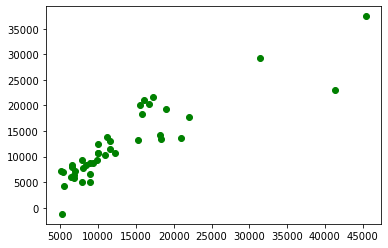

In [108]:
plt.scatter(y_test,predicted_y,color='g')
plt.show()

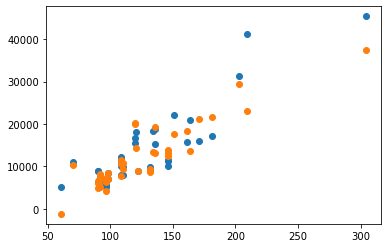

In [109]:
plt.scatter(x_test["enginesize"],y_test)
plt.scatter(x_test["enginesize"],predicted_y)
plt.show()

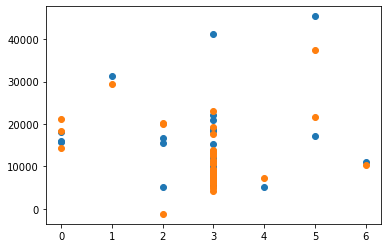

In [110]:
plt.scatter(x_test["enginetype"],y_test)
plt.scatter(x_test["enginetype"],predicted_y)
plt.show()